In [1]:
import sys
sys.path.append('../../Emulator')
import emulator
import numpy as np
import scipy.sparse as sp
import time
from matplotlib import pyplot as plt

# Arithmetic Sparse

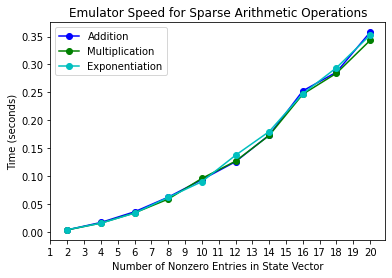

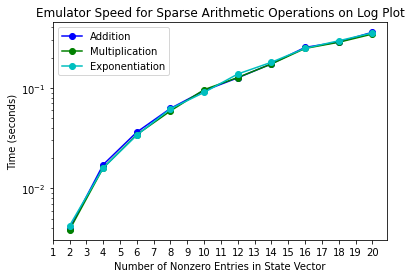

In [3]:
# Define the number of times to repeat the following experiment.
M = 10

# Set the maximum number of states to simulate.
N = 20

# Set the number of qubits and an array containing each possible state.
q = 10
numbers = np.arange(0, 2**q, 1)

# Create a list of various numbers of states <= N to simulate.
num_states = np.arange(2, N+1, 2)

# Define a list to hold the times of each operation.
add_times = []
mult_times = []
exp_times = []

# For each iteration of the experiment:
for m in range(M):
    
    # Define arrays to hold the results of this iteration (batch).
    add_batch = []
    mult_batch = []
    exp_batch = []

    # For each number of states:
    for n in num_states:

        # Define a random initial state.
        a = sp.dok_matrix((2**10, 1), dtype=complex)
        b = sp.dok_matrix((2**10, 1), dtype=complex)
        a_val = np.random.uniform(0, 1, n).astype(complex)
        b_val = np.random.uniform(0, 1, n).astype(complex)
        a_ind = np.random.choice(numbers, n, False)
        b_ind = np.random.choice(numbers, n, False)
        a[a_ind] = a_val
        b[b_ind] = b_val

        # Perform the addition with the emulator and time how long it takes.
        start_time = time.time()
        emulator.add_sparse(a, b)
        add_batch.append(time.time() - start_time)

        # Perform the multiplication with the emulator and time how long it takes.
        start_time = time.time()
        emulator.multiply_sparse(a, b)
        mult_batch.append(time.time() - start_time)

        # Perform the exponentiation with the emulator and time how long it takes.
        start_time = time.time()
        emulator.exponentiate_sparse(a, b)
        exp_batch.append(time.time() - start_time)

    # Append the batch results to the main array.
    add_times.append(add_batch)
    mult_times.append(mult_batch)
    exp_times.append(exp_batch)

# Average the times over each batch to get the average time for each operation.
add_times = np.array(add_times)
mult_times = np.array(mult_times)
exp_times = np.array(exp_times)
add_times = np.sum(add_times, axis=0)/M
mult_times = np.sum(mult_times, axis=0)/M
exp_times = np.sum(exp_times, axis=0)/M

# Plot the times for each operation.
plt.plot(num_states, add_times, 'o-b', label='Addition')
plt.plot(num_states, mult_times, 'o-g', label='Multiplication')
plt.plot(num_states, exp_times, 'o-c', label='Exponentiation')
plt.xticks(np.arange(1, N+1, 1))
plt.title('Emulator Speed for Sparse Arithmetic Operations')
plt.xlabel('Number of Nonzero Entries in State Vector')
plt.ylabel('Time (seconds)')
plt.legend(loc='best')
plt.savefig('arithmetic.png', dpi=600)
plt.show()

# Plot the times for each operation on a log plot.
plt.semilogy(num_states, add_times, 'o-b', label='Addition')
plt.semilogy(num_states, mult_times, 'o-g', label='Multiplication')
plt.semilogy(num_states, exp_times, 'o-c', label='Exponentiation')
plt.xticks(np.arange(1, N+1, 1))
plt.title('Emulator Speed for Sparse Arithmetic Operations on Log Plot')
plt.xlabel('Number of Nonzero Entries in State Vector')
plt.ylabel('Time (seconds)')
plt.legend(loc='best')
plt.savefig('arithmetic_log.png', dpi=600)
plt.show()

# Arithmetic 

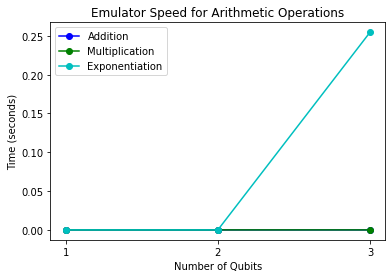

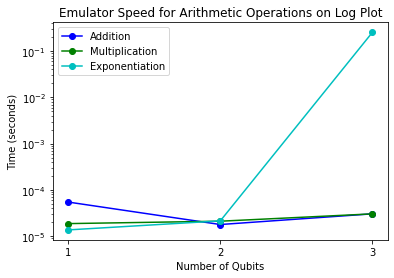

In [2]:
# Define the number of times to repeat the following experiment.
M = 10

# Set the maximum number of qubits to simulate.
N = 3

# Create a list of various numbers of qubits <= N to simulate.
num_qubits = np.arange(1, N+1, 1)

# Define a list to hold the times of each operation.
add_times = []
mult_times = []
exp_times = []

# For each iteration of the experiment:
for m in range(M):
    
    # Define arrays to hold the results of this iteration (batch).
    add_batch = []
    mult_batch = []
    exp_batch = []

    # For each number of qubits:
    for n in num_qubits:

        # Define a random initial state.
        a = np.random.uniform(0, 1, 2**n).astype(complex)
        b = np.random.uniform(0, 1, 2**n).astype(complex)

        # Perform the addition with the emulator and time how long it takes.
        start_time = time.time()
        emulator.add(a, b)
        add_batch.append(time.time() - start_time)

        # Perform the multiplication with the emulator and time how long it takes.
        start_time = time.time()
        emulator.multiply(a, b)
        mult_batch.append(time.time() - start_time)

        # Perform the exponentiation with the emulator and time how long it takes.
        start_time = time.time()
        emulator.exponentiate(a, b)
        exp_batch.append(time.time() - start_time)

    # Append the batch results to the main array.
    add_times.append(add_batch)
    mult_times.append(mult_batch)
    exp_times.append(exp_batch)

# Average the times over each batch to get the average time for each operation.
add_times = np.array(add_times)
mult_times = np.array(mult_times)
exp_times = np.array(exp_times)
add_times = np.sum(add_times, axis=0)/M
mult_times = np.sum(mult_times, axis=0)/M
exp_times = np.sum(exp_times, axis=0)/M

# Plot the times for each operation.
plt.plot(num_qubits, add_times, 'o-b', label='Addition')
plt.plot(num_qubits, mult_times, 'o-g', label='Multiplication')
plt.plot(num_qubits, exp_times, 'o-c', label='Exponentiation')
plt.xticks(np.arange(1, N+1, 1))
plt.title('Emulator Speed for Arithmetic Operations')
plt.xlabel('Number of Qubits')
plt.ylabel('Time (seconds)')
plt.legend(loc='best')
plt.savefig('arithmetic.png', dpi=600)
plt.show()

# Plot the times for each operation on a log plot.
plt.semilogy(num_qubits, add_times, 'o-b', label='Addition')
plt.semilogy(num_qubits, mult_times, 'o-g', label='Multiplication')
plt.semilogy(num_qubits, exp_times, 'o-c', label='Exponentiation')
plt.xticks(np.arange(1, N+1, 1))
plt.title('Emulator Speed for Arithmetic Operations on Log Plot')
plt.xlabel('Number of Qubits')
plt.ylabel('Time (seconds)')
plt.legend(loc='best')
plt.savefig('arithmetic_log.png', dpi=600)
plt.show()

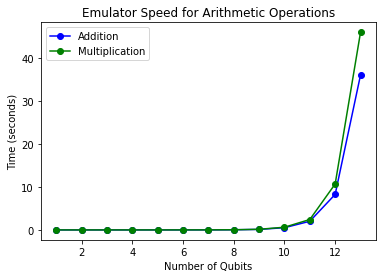

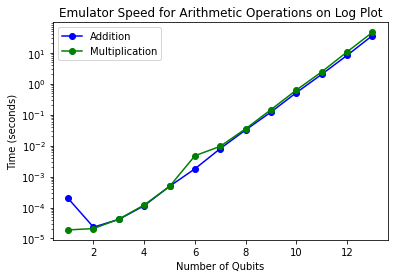

In [2]:
# Define the number of times to repeat the following experiment.
M = 10

# Set the maximum number of qubits to simulate.
N = 13

# Create a list of various numbers of qubits <= N to simulate.
num_qubits = np.arange(1, N+1, 1)

# Define a list to hold the times of each operation.
add_times = []
mult_times = []

# For each iteration of the experiment:
for m in range(M):
    
    # Define arrays to hold the results of this iteration (batch).
    add_batch = []
    mult_batch = []

    # For each number of qubits:
    for n in num_qubits:

        # Define a random initial state.
        a = np.random.uniform(0, 1, 2**n).astype(complex)
        b = np.random.uniform(0, 1, 2**n).astype(complex)

        # Perform the addition with the emulator and time how long it takes.
        start_time = time.time()
        emulator.add(a, b)
        add_batch.append(time.time() - start_time)

        # Perform the multiplication with the emulator and time how long it takes.
        start_time = time.time()
        emulator.multiply(a, b)
        mult_batch.append(time.time() - start_time)
        
    # Append the batch results to the main array.
    add_times.append(add_batch)
    mult_times.append(mult_batch)

# Average the times over each batch to get the average time for each operation.
add_times = np.array(add_times)
mult_times = np.array(mult_times)
add_times = np.sum(add_times, axis=0)/M
mult_times = np.sum(mult_times, axis=0)/M

# Plot the times for each operation.
plt.plot(num_qubits, add_times, 'o-b', label='Addition')
plt.plot(num_qubits, mult_times, 'o-g', label='Multiplication')
plt.title('Emulator Speed for Arithmetic Operations')
plt.xlabel('Number of Qubits')
plt.ylabel('Time (seconds)')
plt.legend(loc='best')
plt.savefig('add_mult.png', dpi=600)
plt.show()

# Plot the times for each operation on a log plot.
plt.semilogy(num_qubits, add_times, 'o-b', label='Addition')
plt.semilogy(num_qubits, mult_times, 'o-g', label='Multiplication')
plt.title('Emulator Speed for Arithmetic Operations on Log Plot')
plt.xlabel('Number of Qubits')
plt.ylabel('Time (seconds)')
plt.legend(loc='best')
plt.savefig('add_mult_log.png', dpi=600)
plt.show()

# QFT

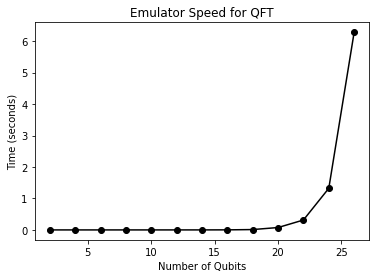

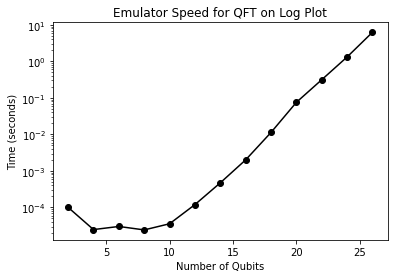

In [4]:
# Define the number of times to repeat the following experiment.
M = 10

# Set the maximum number of qubits to simulate.
N = 26

# Create a list of various numbers of qubits <= N to simulate.
num_qubits = np.arange(2, N+1, 2)

# Define a list to hold the emulator and simulator times respectively.
em_times = []

# For each iteration of the experiment:
for m in range(M):
    
    # Define arrays to hold the results of this iteration (batch).
    em_batch = []

    # For each number of qubits:
    for n in num_qubits:
        
        # Define a random initial state.
        state = np.random.uniform(0, 1, 2**n).astype(complex)
        
        # Perform the QFT with the emulator and time how long it takes.
        start_time = time.time()
        emulator.qft(state)
        em_batch.append(time.time() - start_time)

    # Append the batch results to the main array.
    em_times.append(em_batch)
      
# Average the times over each batch to get the average time for each operation.
em_times = np.array(em_times)
em_times = np.sum(em_times, axis=0)/M

# Plot the times for each QFT operation.
plt.plot(num_qubits, em_times, 'o-k')   
plt.title('Emulator Speed for QFT')
plt.xlabel('Number of Qubits')
plt.ylabel('Time (seconds)')
plt.savefig('em_qft.png', dpi=600)
plt.show()

# Plot the times for each QFT operation on a log plot.
plt.semilogy(num_qubits, em_times, 'o-k')   
plt.title('Emulator Speed for QFT on Log Plot')
plt.xlabel('Number of Qubits')
plt.ylabel('Time (seconds)')
plt.savefig('em_qft_log.png', dpi=600)
plt.show()

# QPE

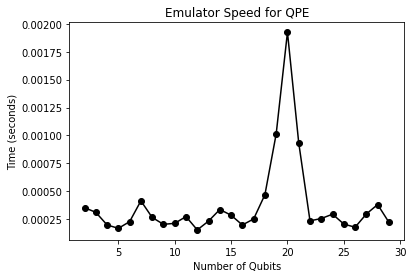

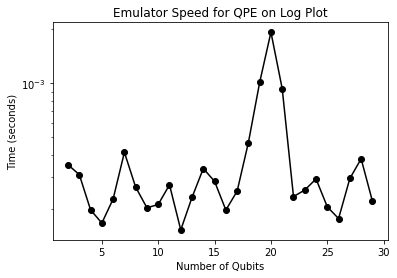

In [9]:
# Define the number of times to repeat the following experiment.
M = 100

# Set the maximum number of qubits to simulate.
N = 29

# Create a list of various numbers of qubits <= N to simulate.
num_qubits = np.arange(2, N+1, 1)

# Define a list to hold the emulator and simulator times respectively.
em_times = []

# For each iteration of the experiment:
for m in range(M):
    
    # Define arrays to hold the results of this iteration (batch).
    em_batch = []

    # Define a matrix (U) and an eigenvector.
    z = np.random.uniform(0, 1)
    U = np.array([[1, 0], [0, np.exp(1j*z)]])
    phi = np.array([0, 1])
    
    # For each number of qubits:
    for n in num_qubits:
        
        # Perform the QFT with the emulator and time how long it takes.
        start_time = time.time()
        emulator.qpe(U, phi, n)
        em_batch.append(time.time() - start_time)

    # Append the batch results to the main array.
    em_times.append(em_batch)
      
# Average the times over each batch to get the average time for each operation.
em_times = np.array(em_times)
em_times = np.sum(em_times, axis=0)/M

# Plot the times for each QPE operation.
plt.plot(num_qubits, em_times, 'o-k')   
plt.title('Emulator Speed for QPE')
plt.xlabel('Number of Qubits')
plt.ylabel('Time (seconds)')
plt.savefig('em_qpe.png', dpi=600)
plt.show()

# Plot the times for each QPE operation on a log plot.
plt.semilogy(num_qubits, em_times, 'o-k')   
plt.title('Emulator Speed for QPE on Log Plot')
plt.xlabel('Number of Qubits')
plt.ylabel('Time (seconds)')
plt.savefig('em_qpe_log.png', dpi=600)
plt.show()